In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from itertools import cycle
from pandas.plotting import register_matplotlib_converters


register_matplotlib_converters()
pd.set_option('max_columns', 200)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# I. Data Acquisition and Overview

In [2]:
df_confirmed = pd.read_csv("input/time_series_19-covid-Confirmed.csv").drop(['Lat', 'Long'], axis=1)
df_deaths = pd.read_csv("input/time_series_19-covid-Deaths.csv").drop(['Lat', 'Long'], axis=1)
df_recovered = pd.read_csv("input/time_series_19-covid-Recovered.csv").drop(['Lat', 'Long'], axis=1)

print("Confirmed dataset: ", df_confirmed.shape)
print("Deaths dataset: ", df_deaths.shape)
print("Recovered dataset: ", df_recovered.shape)

df_confirmed.rename(columns={
    'Country/Region': 'Country',
    'Province/State': 'State'
}, inplace=True)
df_recovered.rename(columns={
    'Country/Region': 'Country',
    'Province/State': 'State'
}, inplace=True)
df_deaths.rename(columns={
    'Country/Region': 'Country',
    'Province/State': 'State'
}, inplace=True)

df_confirmed.head()

Confirmed dataset:  (468, 60)
Deaths dataset:  (468, 60)
Recovered dataset:  (468, 60)


,State,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272
1,NaN,Japan,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924
2,NaN,Singapore,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345
3,NaN,Nepal,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900


In [5]:
world_confirmed = df_confirmed.sum(axis=0, skipna=True)
world_deaths = df_deaths.sum(axis=0, skipna=True)
world_recovered = df_recovered.sum(axis=0, skipna=True)
world_combined_df = pd.concat([world_confirmed, world_deaths, world_recovered], axis=1).reset_index()
world_combined_df.columns = ['date', 'confirmed', 'deaths', 'recovered']
world_combined_df[['confirmed', 'deaths', 'recovered']] = world_combined_df[['confirmed', 'deaths', 'recovered']].apply(pd.to_numeric)
world_combined_df['date'] = pd.to_datetime(world_combined_df['date'])

print("world_combined_df: ", world_combined_df.shape)
world_combined_df.head()

world_combined_df:  (58, 4)


,date,confirmed,deaths,recovered
0,2020-01-22,555,17,28
1,2020-01-23,653,18,30
2,2020-01-24,941,26,36
3,2020-01-25,1434,42,39
4,2020-01-26,2118,56,52


In [6]:
info_df = pd.DataFrame(world_combined_df.dtypes)
info_df['MissingVal'] = world_combined_df.isnull().sum()
info_df['NUnique'] = world_combined_df.nunique()
info_df['Count'] = world_combined_df.count()
info_df['PercentMissingVal'] = info_df.apply(lambda info: round(info.MissingVal / (info.Count + info.MissingVal), 6), axis=1)
round(info_df['MissingVal'] / info_df['Count'], 6)
info_df = info_df.rename(columns = {0: 'DataType'})
info_df

,DataType,MissingVal,NUnique,Count,PercentMissingVal
date,datetime64[ns],0,58,58,0.0
confirmed,int64,0,58,58,0.0
deaths,int64,0,58,58,0.0
recovered,int64,0,58,58,0.0


# II. Exploratory Data Analysis

In [44]:
def plot_covid19_trends(df, title):
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=df['date'], 
        y=df['confirmed'],
        mode='lines+markers',
        name='Confirmed',
        line=dict(color='blue', width=2)
    ))
    fig.add_trace(go.Scatter(
        x=df['date'], 
        y=df['deaths'],
        mode='lines+markers',
        name='Deaths',
        line=dict(color='Red', width=2)
    ))
    fig.add_trace(go.Scatter(
        x=df['date'], 
        y=df['recovered'],
        mode='lines+markers',
        name='Recovered',
        line=dict(color='Green', width=2)
    ))
    fig.update_layout(
        title=title,
        xaxis_tickfont_size=14,
        yaxis=dict(
            title='Number of Cases',
            titlefont_size=16,
            tickfont_size=14,
        ),
        legend=dict(
            x=0,
            y=1.0,
            bgcolor='rgba(255, 255, 255, 0)',
            bordercolor='rgba(255, 255, 255, 0)'
        )
    )
    fig.show()

In [45]:
def plot_fatality_rates(df, title):
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=df['date'], 
        y=df['fatality_rate_by_closed_cases'],
        mode='lines+markers',
        name='Deaths / Closed Cases',
        line=dict(color='Purple', width=2)
    ))
    fig.add_trace(go.Scatter(
        x=df['date'], 
        y=df['fatality_rate_by_total_cases'],
        mode='lines+markers',
        name='Deaths / Total Cases',
        line=dict(color='Gold', width=2)
    ))
    fig.update_layout(
        title=title,
        xaxis_tickfont_size=14,
        yaxis=dict(
            title='Fatality Rate',
            titlefont_size=16,
            tickfont_size=14,
        ),
        legend=dict(
            x=0,
            y=1.0,
            bgcolor='rgba(255, 255, 255, 0)',
            bordercolor='rgba(255, 255, 255, 0)'
        )
    )
    fig.show()

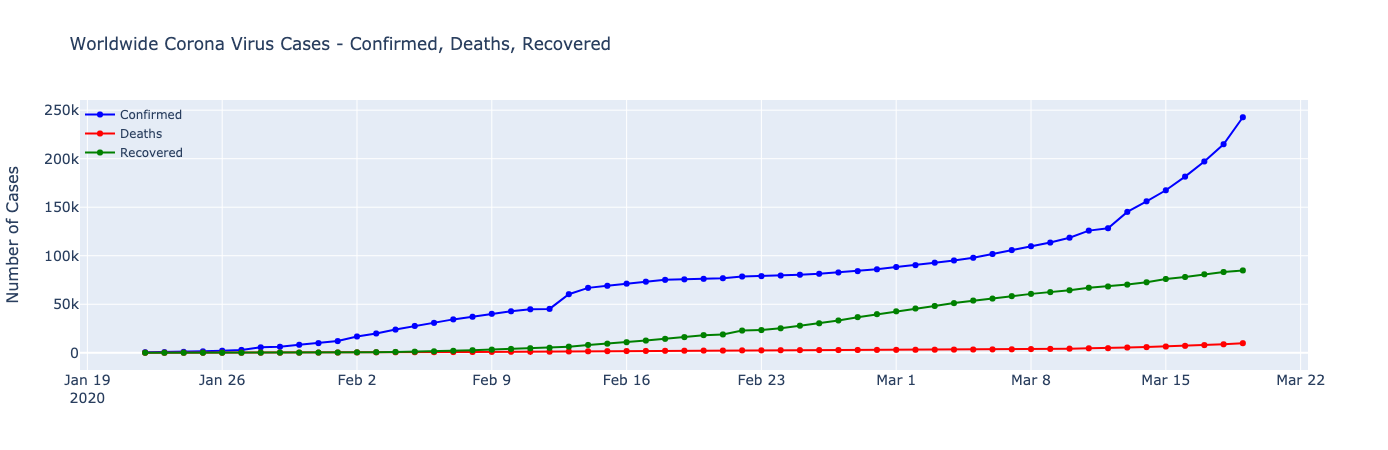

In [46]:
plot_covid19_trends(world_combined_df, 'Worldwide Corona Virus Cases - Confirmed, Deaths, Recovered')

## 2.2 Hubei

In [52]:
hubei_confirmed = df_confirmed[df_confirmed['State'] == 'Hubei'].T
hubei_deaths = df_deaths[df_deaths['State'] == 'Hubei'].T
hubei_recovered = df_recovered[df_recovered['State'] == 'Hubei'].T
hubei_combined_df = pd.concat([hubei_confirmed, hubei_deaths, hubei_recovered], axis=1)[2:].reset_index()
hubei_combined_df.columns = ['date', 'confirmed', 'deaths', 'recovered']
hubei_combined_df[['confirmed', 'deaths', 'recovered']] = hubei_combined_df[['confirmed', 'deaths', 'recovered']].apply(pd.to_numeric)
hubei_combined_df['fatality_rate_by_total_cases'] = hubei_combined_df['deaths'] / hubei_combined_df['confirmed']
hubei_combined_df['fatality_rate_by_closed_cases'] = hubei_combined_df['deaths'] / (hubei_combined_df['deaths'] + hubei_combined_df['recovered'])
hubei_combined_df[['fatality_rate_by_total_cases', 'fatality_rate_by_closed_cases']] = hubei_combined_df[['fatality_rate_by_total_cases', 'fatality_rate_by_closed_cases']].fillna(value=0)
hubei_combined_df['date'] = pd.to_datetime(hubei_combined_df['date'])

hubei_combined_df.head()

,date,confirmed,deaths,recovered,fatality_rate_by_total_cases,fatality_rate_by_closed_cases
0,2020-01-22,444,17,28,0.038288,0.377778
1,2020-01-23,444,17,28,0.038288,0.377778
2,2020-01-24,549,24,31,0.043716,0.436364
3,2020-01-25,761,40,32,0.052562,0.555556
4,2020-01-26,1058,52,42,0.049149,0.553191


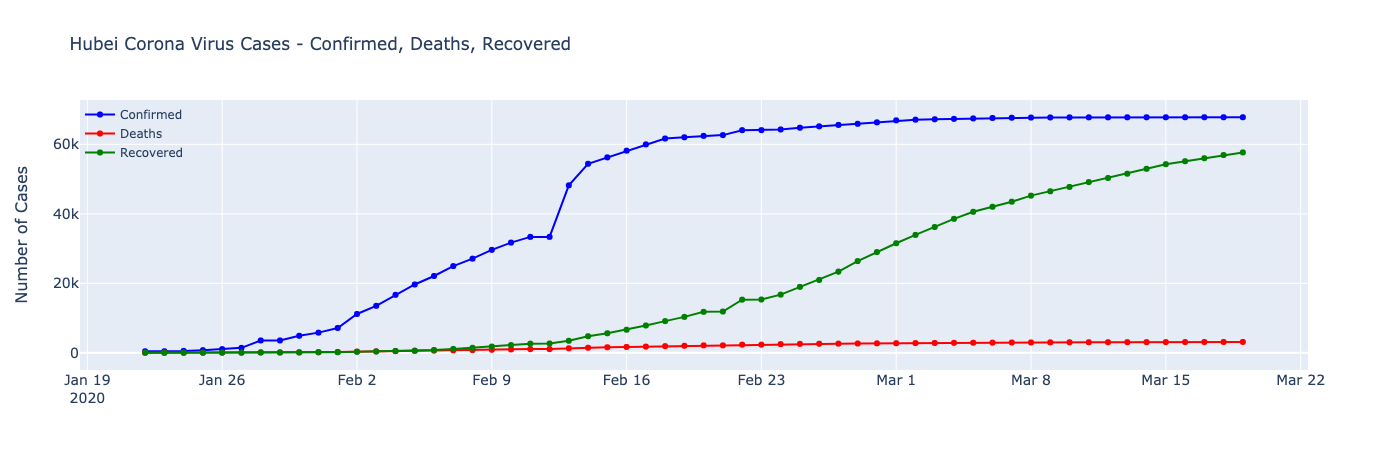

In [48]:
plot_covid19_trends(hubei_combined_df, 'Hubei Corona Virus Cases - Confirmed, Deaths, Recovered')

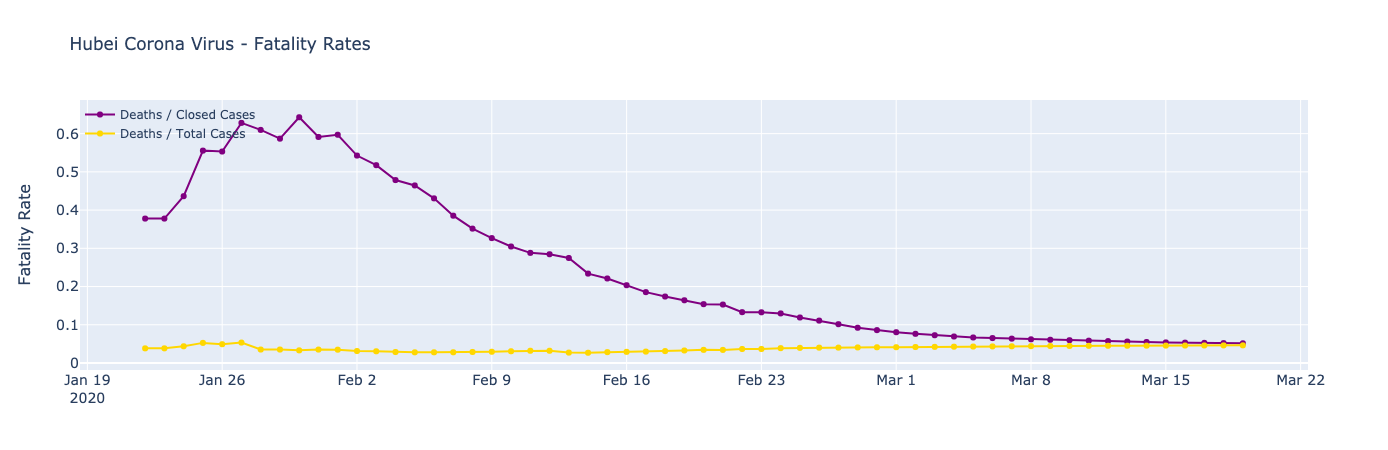

In [53]:
plot_fatality_rates(hubei_combined_df, 'Hubei Corona Virus - Fatality Rates')

## 2.3 Italy

In [49]:
italy_confirmed = df_confirmed[df_confirmed['Country'] == 'Italy'].T
italy_deaths = df_deaths[df_deaths['Country'] == 'Italy'].T
italy_recovered = df_recovered[df_recovered['Country'] == 'Italy'].T
italy_combined_df = pd.concat([italy_confirmed, italy_deaths, italy_recovered], axis=1)[2:].reset_index()
italy_combined_df.columns = ['date', 'confirmed', 'deaths', 'recovered']
italy_combined_df[['confirmed', 'deaths', 'recovered']] = italy_combined_df[['confirmed', 'deaths', 'recovered']].apply(pd.to_numeric)
italy_combined_df['fatality_rate_by_total_cases'] = italy_combined_df['deaths'] / italy_combined_df['confirmed']
italy_combined_df['fatality_rate_by_closed_cases'] = italy_combined_df['deaths'] / (italy_combined_df['deaths'] + italy_combined_df['recovered'])
italy_combined_df[['fatality_rate_by_total_cases', 'fatality_rate_by_closed_cases']] = italy_combined_df[['fatality_rate_by_total_cases', 'fatality_rate_by_closed_cases']].fillna(value=0)
italy_combined_df['date'] = pd.to_datetime(italy_combined_df['date'])

italy_combined_df.head()

,date,confirmed,deaths,recovered,fatality_rate_by_total_cases,fatality_rate_by_closed_cases
0,2020-01-22,0,0,0,0.0,0.0
1,2020-01-23,0,0,0,0.0,0.0
2,2020-01-24,0,0,0,0.0,0.0
3,2020-01-25,0,0,0,0.0,0.0
4,2020-01-26,0,0,0,0.0,0.0


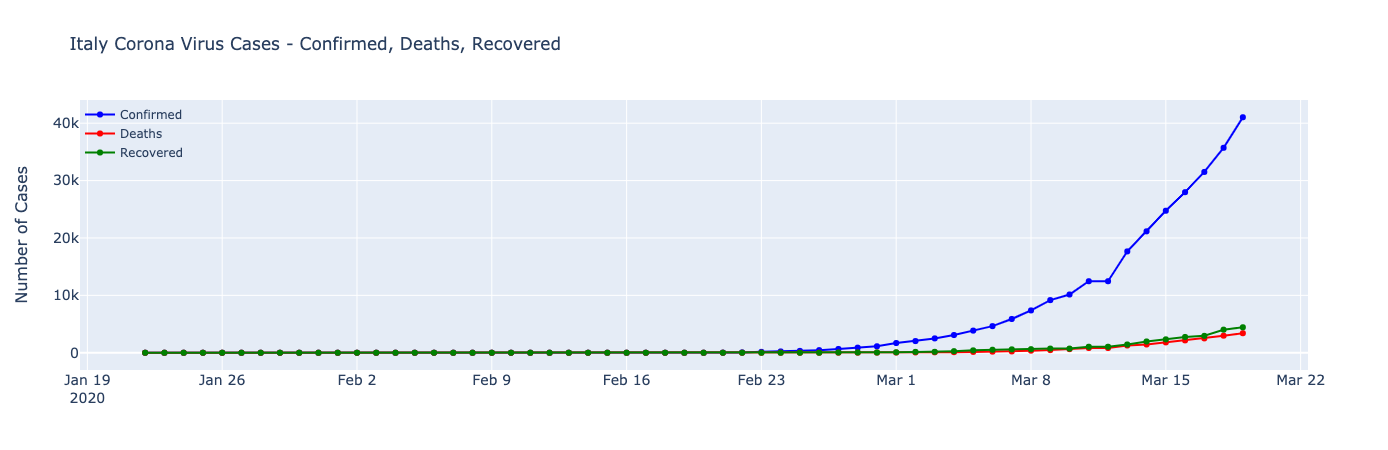

In [50]:
plot_covid19_trends(italy_combined_df, 'Italy Corona Virus Cases - Confirmed, Deaths, Recovered')

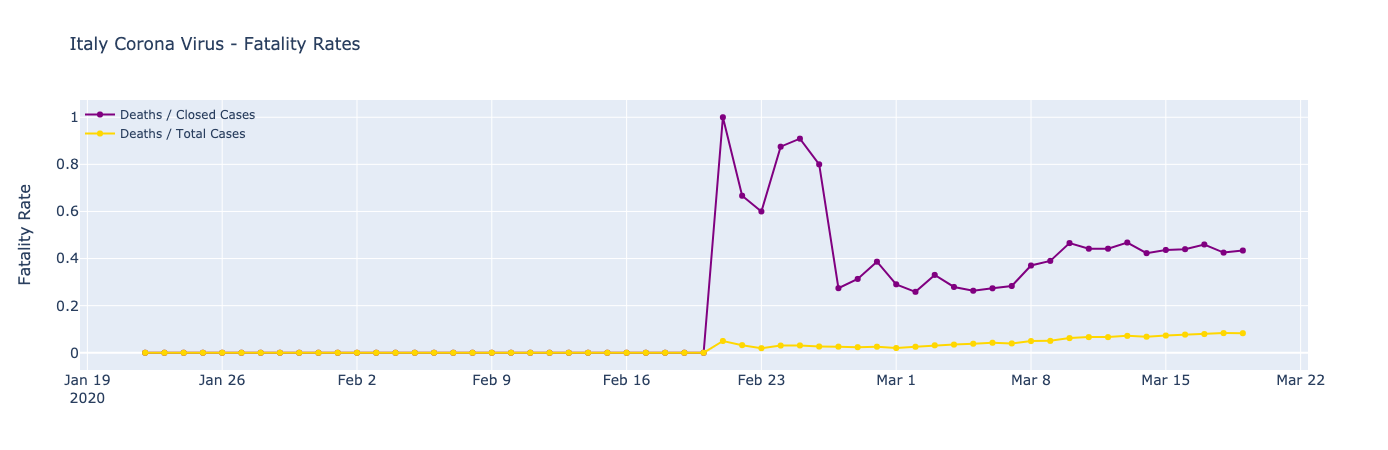

In [51]:
plot_fatality_rates(italy_combined_df, 'Italy Corona Virus - Fatality Rates')

In [58]:
italy_combined_df.to_csv('output/italy.csv', index=False)

## 2.4 South Korea

In [55]:
korea_confirmed = df_confirmed[df_confirmed['Country'] == 'Korea, South'].T
korea_deaths = df_deaths[df_deaths['Country'] == 'Korea, South'].T
korea_recovered = df_recovered[df_recovered['Country'] == 'Korea, South'].T
korea_combined_df = pd.concat([korea_confirmed, korea_deaths, korea_recovered], axis=1)[2:].reset_index()
korea_combined_df.columns = ['date', 'confirmed', 'deaths', 'recovered']
korea_combined_df[['confirmed', 'deaths', 'recovered']] = korea_combined_df[['confirmed', 'deaths', 'recovered']].apply(pd.to_numeric)
korea_combined_df['fatality_rate_by_total_cases'] = korea_combined_df['deaths'] / korea_combined_df['confirmed']
korea_combined_df['fatality_rate_by_closed_cases'] = korea_combined_df['deaths'] / (korea_combined_df['deaths'] + korea_combined_df['recovered'])
korea_combined_df[['fatality_rate_by_total_cases', 'fatality_rate_by_closed_cases']] = korea_combined_df[['fatality_rate_by_total_cases', 'fatality_rate_by_closed_cases']].fillna(value=0)
korea_combined_df['date'] = pd.to_datetime(korea_combined_df['date'])

korea_combined_df.head()

,date,confirmed,deaths,recovered,fatality_rate_by_total_cases,fatality_rate_by_closed_cases
0,2020-01-22,1,0,0,0.0,0.0
1,2020-01-23,1,0,0,0.0,0.0
2,2020-01-24,2,0,0,0.0,0.0
3,2020-01-25,2,0,0,0.0,0.0
4,2020-01-26,3,0,0,0.0,0.0


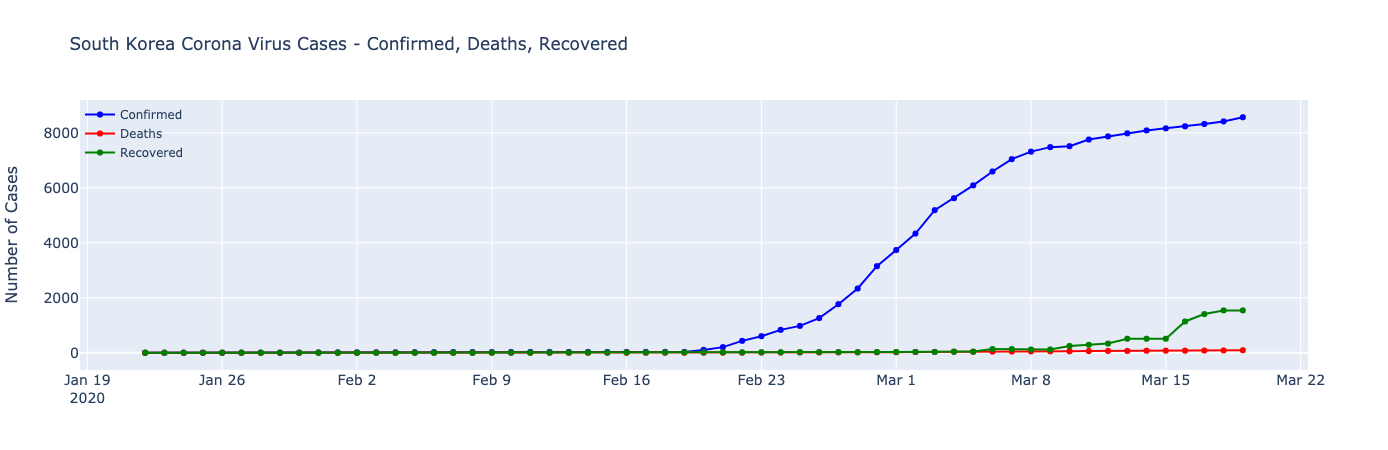

In [56]:
plot_covid19_trends(korea_combined_df, 'South Korea Corona Virus Cases - Confirmed, Deaths, Recovered')

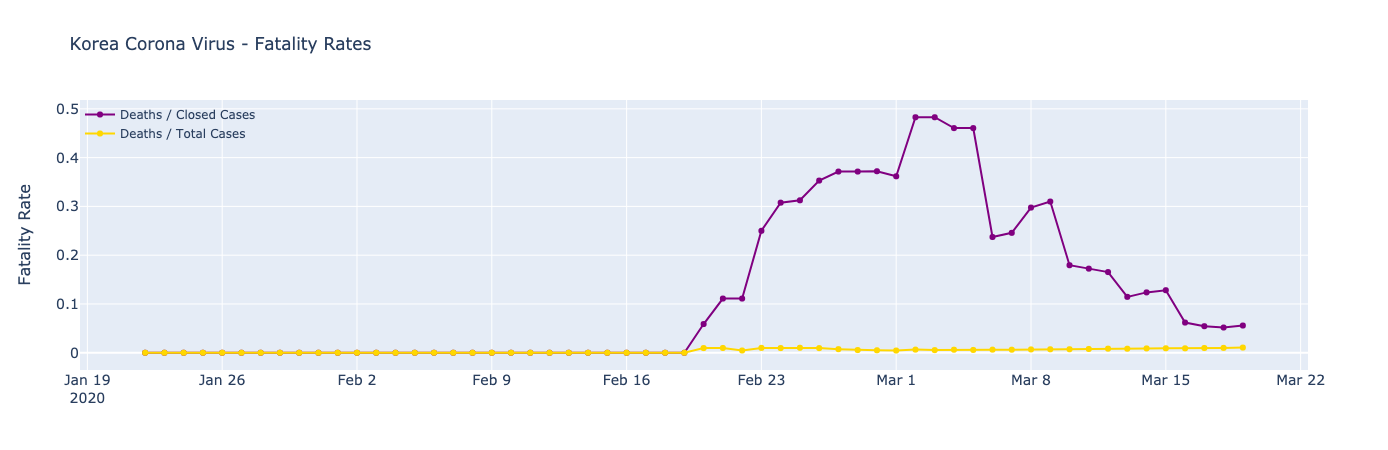

In [57]:
plot_fatality_rates(korea_combined_df, 'Korea Corona Virus - Fatality Rates')